## SVMs for Diabetes Prediction





### Background and Task

Here we are utilizing the *diabetes.csv* dataset. Subject is the diagnostic prediction of diabetes, based on certain diagnostic measurements contained in the dataset. We will utilize this dataset for the following task:


### Develop a SVM-Classifier to Predict Diabetes and to Assess its Precision and Accuracy.

The evaluation should include at least the following points:

* Overview and interpretation of descriptive statistics for the dataset
* Checking for missing values
* Feature engineering with regard to zero values for some variables
* Development of the SVM classifier
* Checking the classification accuracy
* Developing ideas for improving classification accuracy


## Predicting Diabetes


#### Background
The dataset used in this project is called **diabetes.csv**. This dataset originates from the *National Institute of Diabetes and Digestive and Kidney Diseases*. Goal of the dataset is to diagnostically predict whether a patient has diabetes or not based on specific diagnostic measurements included in the dataset. Several limitations were placed on selecting the total 2000 patients in the data set from a larger database. Specifically, all patients here are <font color=orange>**women who are at least 21 years old and of Pima Indian descent**</font>. 
​
The data set consists 8 medical predictor variables (characteristics or features) and one target variable, <font color=orange>**“outcome” (0: no diabetes; 1: diabetes)**</font>. Predictor variables include the number of pregnancies the patient has had, her BMI, insulin levels, age, etc.:
​
- Pregnancies: number of pregnancies
- Glucose: plasma glucose concentration
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Thickness of the triceps skin fold (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes family tree function
- Age: Age in years
- Outcome: target variable (0 or 1)

#### Dataset:

https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [31]:
# Python Version 13.6
# Library Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [32]:
# DF import from CSV
df = pd.read_csv("diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Descriptive Statistics

In [33]:
df.shape
# 2000 datapoints with 9 variables

(2000, 9)

In [34]:
df.describe()
# The mean and median of pregnancies, blood pressure, bmi, diabetes pedigree function and age seem to be relatively close to each other indicating a 
# normal distribution. However, glucose, insulin and skin thickness have a mean that is significantly higher than the median indicating a right skewed distribution.
# Furthermore, the max values of glucose, blood pressure, skin thickness, insulin and bmi seem quite high compared to their respective means and medians 
# indicating the presence of outliers in these variables.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [35]:
df.info()
# No missing values in the dataset with all data being integers and floats. This doesnt mean however, that the dataset doesnt contain missing values filled with 0!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


### Data Visualization

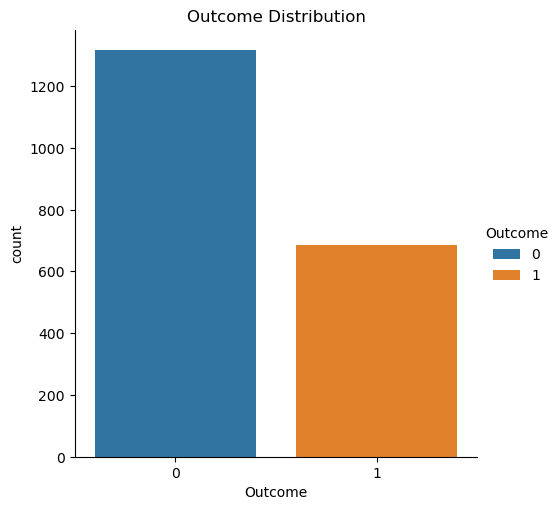

In [ ]:
sns.catplot(data=df, kind="count", x="Outcome", hue="Outcome")
plt.title("Outcome Distribution")
plt.show()

# The dataset is biased towards controls as is often the case in case-control-studies

C:\Users\vvedd\AppData\Local\Temp\ipykernel_33896\3290094633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("Outcome", axis=1, inplace=True)
C:\Users\vvedd\AppData\Local\Temp\ipykernel_33896\3290094633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.drop("Outcome", axis=1, inplace=True)


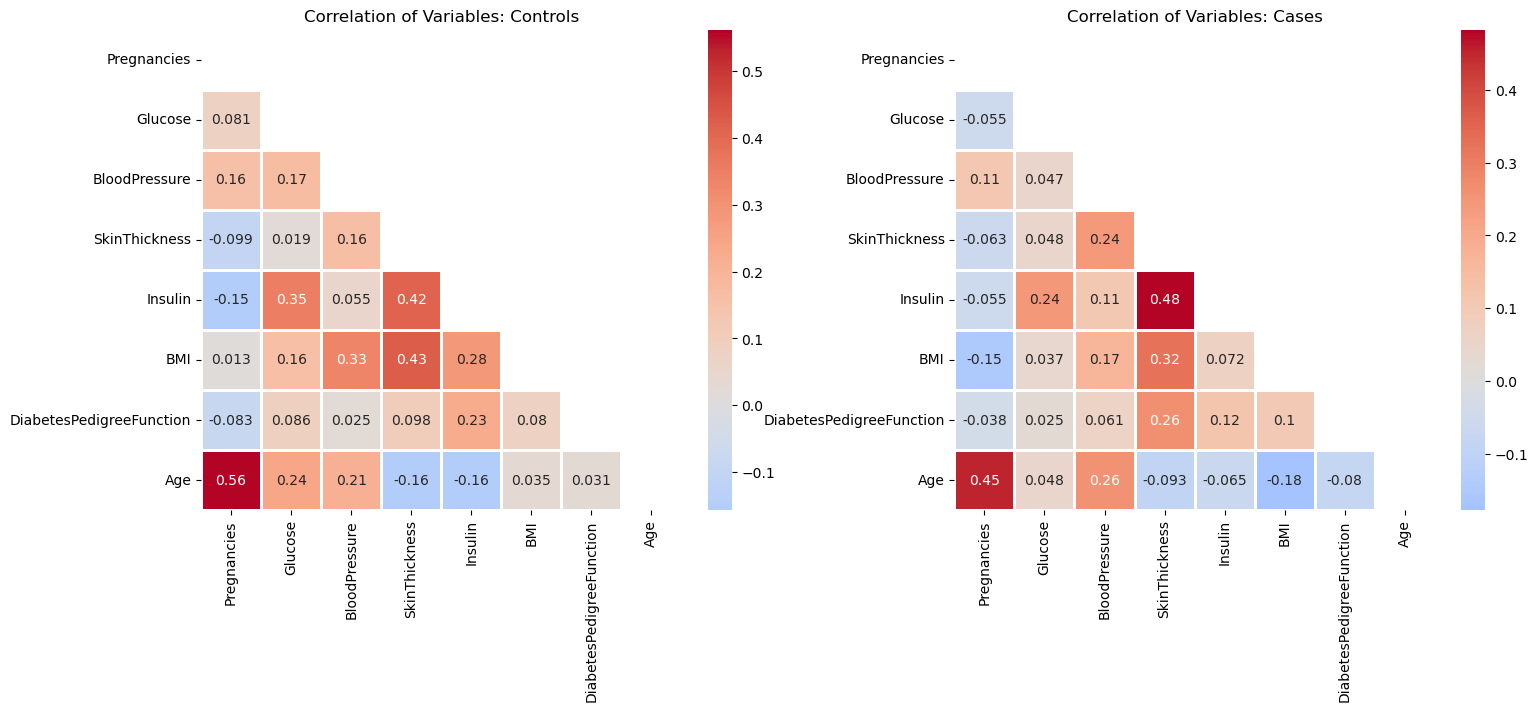

In [36]:
df1 = df[df["Outcome"] == 1]
df1.drop("Outcome", axis=1, inplace=True)
df0 = df[df["Outcome"] == 0]
df0.drop("Outcome", axis=1, inplace=True)

d1corr = df1.corr()
d0corr = df0.corr()

mask1= np.triu(np.ones_like(df1.corr(), dtype=bool))
mask0= np.triu(np.ones_like(df0.corr(), dtype=bool))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7), layout='constrained')
sns.heatmap(data=d0corr, annot=True, cmap='coolwarm', linewidths=1, center=0, mask=mask0, ax=ax1, square= True)
sns.heatmap(data=d1corr, annot=True, cmap='coolwarm', linewidths=1, center=0, mask=mask1, ax=ax2, square= True)
ax1.set_title("Correlation of Variables: Controls")
ax2.set_title("Correlation of Variables: Cases")
plt.show()

# Majority of features have low correlation with the target variable outcome. 

In [37]:
# Comparing Correlation Matrices via Permutation Testing

def matrix_diff_metric(matrix1, matrix2):
    """Calculates the sum of absolute differences between unique upper triangles."""
    # Ensure inputs are numpy arrays for consistent indexing
    matrix1 = np.asarray(matrix1)
    matrix2 = np.asarray(matrix2)
    upper_tri_1 = matrix1[np.triu_indices_from(matrix1, k=1)]
    upper_tri_2 = matrix2[np.triu_indices_from(matrix2, k=1)]
    return np.sum(np.abs(upper_tri_1 - upper_tri_2))

def compare_corr_matrices_permutation(data1, data2, num_permutations=10000):
    """
    Performs a permutation test to compare two correlation matrices derived from 
    independent datasets (e.g., case vs control).
    
    Arguments:
    data1 (pd.DataFrame or np.ndarray): Data for group 1 (samples x features).
    data2 (pd.DataFrame or np.ndarray): Data for group 2 (samples x features).
    """
    # Converts DataFrames to numpy arrays for efficiency and consistency
    data1_np = data1.values if isinstance(data1, pd.DataFrame) else np.asarray(data1)
    data2_np = data2.values if isinstance(data2, pd.DataFrame) else np.asarray(data2)
    
    n1_samples = data1_np.shape[0]
    n2_samples = data2_np.shape[0]
    combined_data = np.concatenate((data1_np, data2_np), axis=0)
    total_samples = combined_data.shape[0]
    
    # Calculates the observed difference metric
    corr1_obs = np.corrcoef(data1_np, rowvar=False)
    corr2_obs = np.corrcoef(data2_np, rowvar=False)
    observed_diff = matrix_diff_metric(corr1_obs, corr2_obs)
    
    permuted_diffs = []
    for _ in range(num_permutations):
        # Shuffles the combined data sample indices
        permuted_indices = np.random.permutation(total_samples)
        perm_data1 = combined_data[permuted_indices[:n1_samples]]
        perm_data2 = combined_data[permuted_indices[n1_samples:]]
        
        # Calculates correlation matrices for permuted data
        corr1_perm = np.corrcoef(perm_data1, rowvar=False)
        corr2_perm = np.corrcoef(perm_data2, rowvar=False)
        
        # Calculates the difference metric for the permuted data
        perm_diff = matrix_diff_metric(corr1_perm, corr2_perm)
        permuted_diffs.append(perm_diff)
        
    # Calculates the p-value (one-tailed test since differences are >= 0)
    p_value = np.sum(np.array(permuted_diffs) >= observed_diff) / num_permutations
    
    return observed_diff, p_value

observed_diff, p_value = compare_corr_matrices_permutation(df1, df0, num_permutations=5000)

print("-" * 30)
print(f"Observed matrix difference (Metric Sum of Abs Diffs): {observed_diff:.4f}")
print(f"P-value from permutation test: {p_value:.4f}")
print("-" * 30)

if p_value < 0.05:
    print("The correlation matrices of the case (df1) and control (df0) groups are significantly different (p < 0.05).")
else:
    print("There is no significant difference between the correlation matrices.")

------------------------------
Observed matrix difference (Metric Sum of Abs Diffs): 2.8023
P-value from permutation test: 0.0000
------------------------------
The correlation matrices of the case (df1) and control (df0) groups are significantly different (p < 0.05).


In [38]:
bins = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
m_labels = ["0", "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"]

df.loc[:,"Age_bins"] = pd.cut(df.iloc[:,7], bins=bins, labels=m_labels, right=False, include_lowest=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_bins
0,2,138,62,35,0,33.6,0.127,47,1,40
1,0,84,82,31,125,38.2,0.233,23,0,20
2,0,145,0,0,0,44.2,0.630,31,1,30
3,0,135,68,42,250,42.3,0.365,24,1,20
4,1,139,62,41,480,40.7,0.536,21,0,20


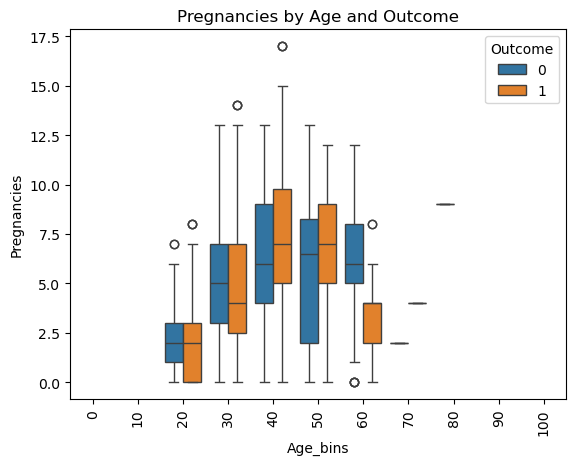

In [ ]:
sns.boxplot(data=df, x="Age_bins", y="Pregnancies", hue="Outcome")
plt.xticks(rotation=90)
plt.title("Pregnancies by Age and Outcome")
plt.show()

# Pregnancies tend to increase with age in both cases and controls. Cases generally have higher number of pregnancies across all age groups compared to controls.
# Here, the cultural background needs to be considered, as older generations might have had different family planning norms compared to younger generations.
# Also, listed here are pregnancies, unfortunately this data doesn't give an indication if these were successful pregnancies or not. This could make a crucial difference
# when interpreting the relevance of diabetes for pregnancy outcomes. But we can conclude, that diabetes doesn't affect fertility in general.

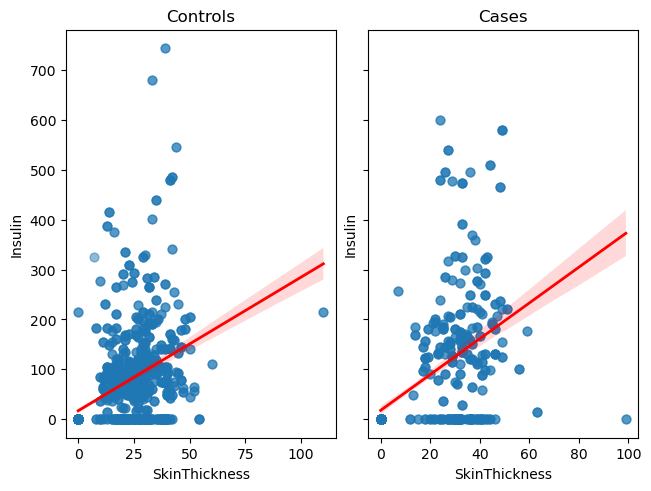

In [ ]:
fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, layout='constrained', sharey=True)
sns.regplot(x="SkinThickness", y="Insulin", data=df0, ax=ax3,
            scatter_kws={"alpha":0.5, "s":40}, line_kws={"color":"red", "linewidth":2})
ax3.set_title("Controls")
sns.regplot(x="SkinThickness", y="Insulin", data=df1, ax=ax4,
            scatter_kws={"alpha":0.5, "s":40}, line_kws={"color":"red", "linewidth":2})
ax4.set_title("Cases")
plt.show()

# Skin thickness and insulin levels show a positive correlation in both cases and controls, but the correlation appears stronger in cases.

In [39]:
df0.loc[:,"Age_bins"] = pd.cut(df0.iloc[:,7], bins=bins, labels=m_labels, right=False, include_lowest=True)
df1.loc[:,"Age_bins"] = pd.cut(df1.iloc[:,7], bins=bins, labels=m_labels, right=False, include_lowest=True)
df1.head()

C:\Users\vvedd\AppData\Local\Temp\ipykernel_33896\3688329468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.loc[:,"Age_bins"] = pd.cut(df0.iloc[:,7], bins=bins, labels=m_labels, right=False, include_lowest=True)
C:\Users\vvedd\AppData\Local\Temp\ipykernel_33896\3688329468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:,"Age_bins"] = pd.cut(df1.iloc[:,7], bins=bins, labels=m_labels, right=False, include_lowest=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_bins
0,2,138,62,35,0,33.6,0.127,47,40
2,0,145,0,0,0,44.2,0.630,31,30
3,0,135,68,42,250,42.3,0.365,24,20
11,4,125,70,18,122,28.9,1.144,45,40
16,7,195,70,33,145,25.1,0.163,55,50


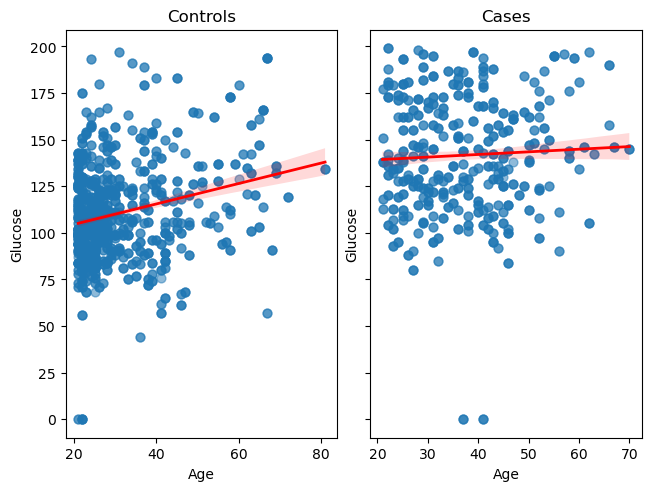

In [ ]:
fig3, (ax5, ax6) = plt.subplots(nrows=1, ncols=2, layout='constrained', sharey=True)
sns.regplot(x=df0.columns[7], y="Glucose", data=df0, ax=ax5,
            scatter_kws={"alpha":0.5, "s":40}, line_kws={"color":"red", "linewidth":2})
ax5.set_title("Controls")
sns.regplot(x=df1.columns[7], y="Glucose", data=df1, ax=ax6,
            scatter_kws={"alpha":0.5, "s":40}, line_kws={"color":"red", "linewidth":2})
ax6.set_title("Cases")
plt.show()

# It is well known, that glucose regulation is affected with age and in some cases can lead to age-related diabetes. Cases have been diagnosed, therefore their glucose 
# levels are managed and no correlation can be observed.

## Feature Engineering

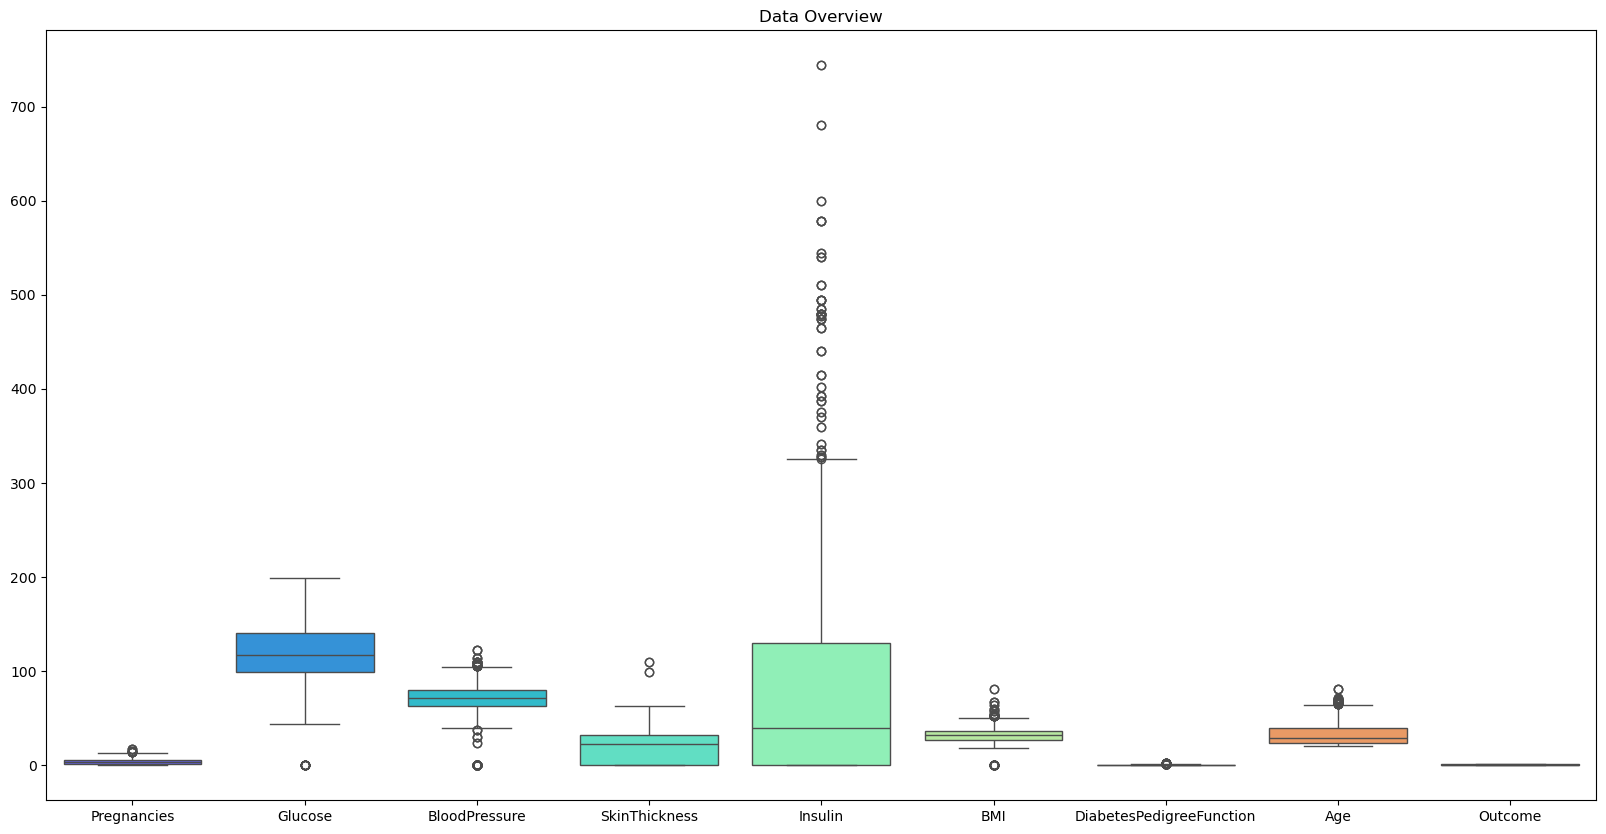

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df, orient='v', palette='rainbow')
plt.title("Data Overview")
plt.show()

# Insulin has the most outliers, but we can also see them in BP, BMI, SkinThickness and Glucose.

### Handling Missing Values

In [41]:
zero_counts_df = (df == 0).sum()
print(zero_counts_df)
print("-----------------------------------------------")
print(zero_counts_df/len(df))

# As the amount of 0-values exceeds 5% in several columns, a mean/median imputation is not recommended. Here multiple imputation (MICE) 
# or regression imputation are preferrable.

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
Age_bins                       0
dtype: int64
-----------------------------------------------
Pregnancies                 0.1505
Glucose                     0.0065
BloodPressure               0.0450
SkinThickness               0.2865
Insulin                     0.4780
BMI                         0.0140
DiabetesPedigreeFunction    0.0000
Age                         0.0000
Outcome                     0.6580
Age_bins                    0.0000
dtype: float64


In [16]:
# This is the mean/median imputation, that was NOT used for this project as it would artificially reduce the variance of the respective features
warnings.filterwarnings("ignore")
index_s = df[df['SkinThickness'] == 0].index.values
for i in index_s:
    df['SkinThickness'][i] = df['SkinThickness'].mean()

index_I = df[df['Insulin'] == 0].index.values
for i in index_I:
    df['Insulin'][i] = df['Insulin'].mean()

index_g = df[df['Glucose'] == 0].index.values
for i in index_g:
    df['Glucose'][i] = df['Glucose'].mean()

index_b = df[df['BloodPressure'] == 0].index.values
for i in index_b:
    df['BloodPressure'][i] = df['BloodPressure'].mean()

index_bmi = df[df['BMI'] == 0].index.values
for i in index_bmi:
    df['BMI'][i] = df['BMI'].mean()


In [42]:
# Alternatively: K-Nearest Neighbors (KNN) Imputation
# This method finds the k most similar subjects to the one with a missing value and imputes the missing value based on the average of those neighbors' values.

# Replace 0 with NaN
df_impute = df.replace(0, np.nan)

# Impute using KNN
imputer = KNNImputer(n_neighbors=5) # Choose a number of neighbors
df_imputed_array = imputer.fit_transform(df_impute)
df_imputed = pd.DataFrame(df_imputed_array, columns=df.columns)

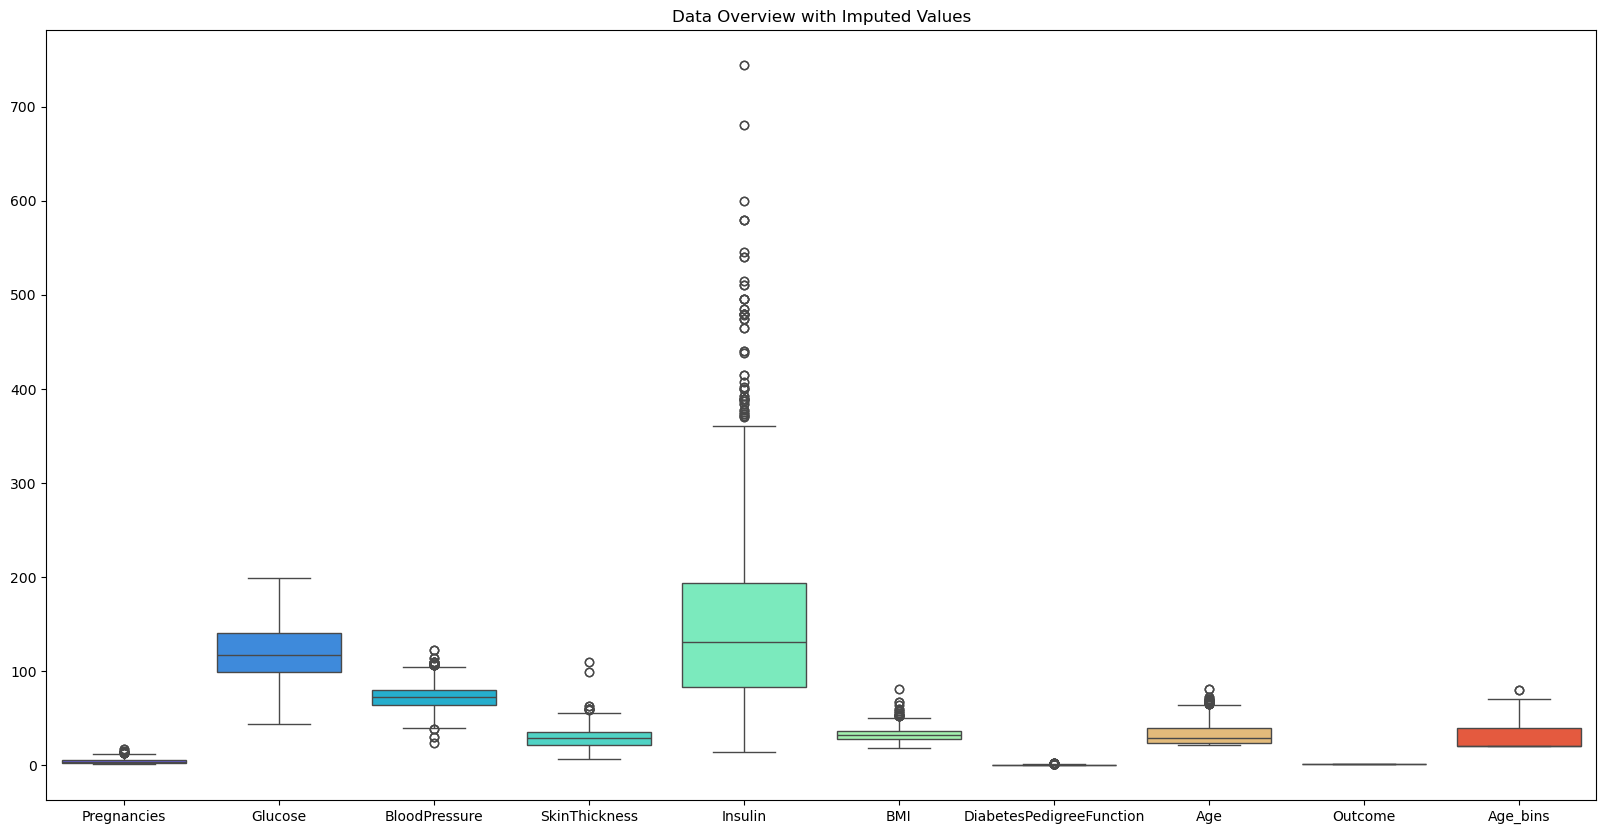

In [43]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df_imputed, orient='v', palette='rainbow')
plt.title("Data Overview with Imputed Values")
plt.show()

#### Scaling Features

In [44]:
# Scaling Features to be able to apply SVM
scaler = StandardScaler()
scaler.fit(df_imputed.drop('Outcome', axis = 1))

# Creating scaled features and turning them into a DataFrame
scaled_features = scaler.transform(df_imputed.drop('Outcome', axis = 1))
scaled_data = pd.DataFrame(scaled_features, columns = df_imputed.columns[ : -1])

scaled_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.748355,0.525648,-0.851599,0.574379,-0.340219,0.139861,-1.063246,1.180424,0.947190
1,-0.548412,-1.236869,0.798835,0.177852,-0.292393,0.776424,-0.735551,-0.856326,-0.767181
2,0.651249,0.754122,0.567774,0.276984,0.676071,1.606723,0.491759,-0.177409,0.090005
3,-0.348468,0.427730,-0.356469,1.268300,0.953059,1.343795,-0.327478,-0.771462,-0.767181
4,-1.081594,0.558287,-0.851599,1.169168,3.244693,1.122382,0.201161,-1.026055,-0.767181


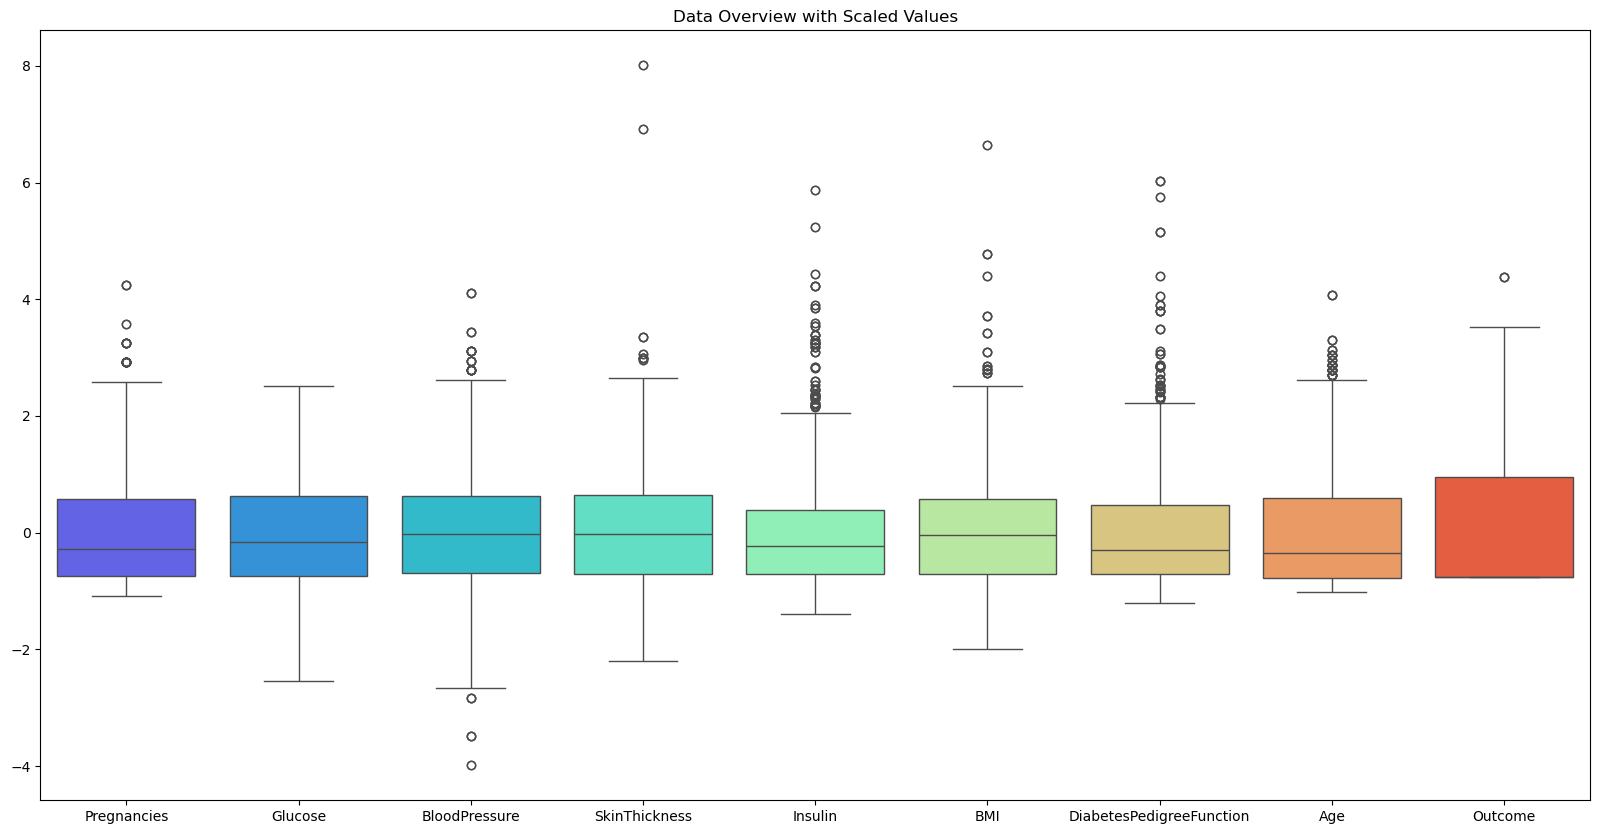

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(data = scaled_data, orient='v', palette='rainbow')
plt.title("Data Overview with Scaled Values")
plt.show()

# The data is now to scale

In [46]:
scaled_data[['Insulin', "BMI", "DiabetesPedigreeFunction"]].describe()

# Scaling doesnt change, that there are still a lot of outliers in these datasets, that need to either be cut with an outlier test or be winsorization.

,Insulin,BMI,DiabetesPedigreeFunction
count,2.000000e+03,2.000000e+03,2.000000e+03
mean,-3.463896e-16,-1.243450e-16,1.225686e-16
std,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.398356e+00,-1.991240e+00,-1.214728e+00
25%,-7.108656e-01,-7.042763e-01,-7.015452e-01
50%,-2.306190e-01,-4.003702e-02,-2.934724e-01
75%,3.950965e-01,5.826873e-01,4.732099e-01
max,5.875089e+00,6.643871e+00,6.025474e+00


#### Handling Outliers

In [47]:
# Winsorization

# Index with column names
feature_data = scaled_data.columns

for i in feature_data:
    # Calculates the quartiles and IQR for the current column
    q1 = scaled_data[i].quantile(0.25)
    q3 = scaled_data[i].quantile(0.75)
    IQR = q3 - q1

    high = q3 + (1.5 * IQR)
    low = q1 - (1.5 * IQR)
    
    scaled_data.loc[scaled_data[i] > high, i] = high
    scaled_data.loc[scaled_data[i] < low, i] = low
print("Winsorization complete.")


Winsorization complete.


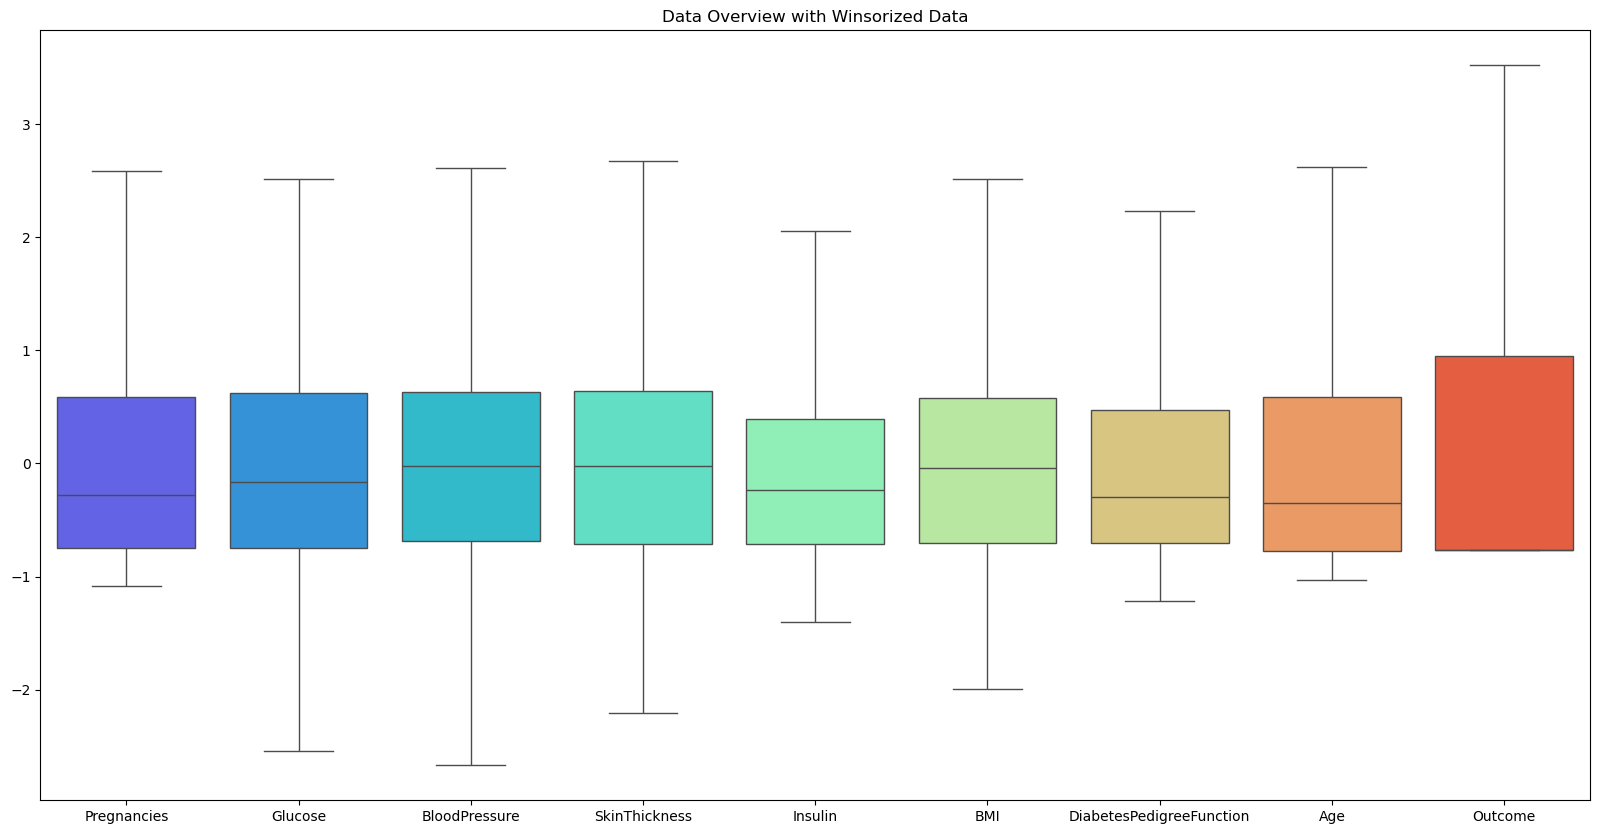

In [48]:
plt.figure(figsize=(20,10))
sns.boxplot(data = scaled_data, orient='v', palette='rainbow')
plt.title("Data Overview with Winsorized Data")
plt.show()

# Outliers are now adjusted to the 75% and 25% quartiles respectively

## Developing the Classifier

In [49]:
y = df["Outcome"].values
X = scaled_data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
svc = SVC()
# Fitting SVC to training data
svc.fit(X_train, y_train)



SVC()

In [ ]:

# Data prediction
predict = svc.predict(X_test)

print("Prediction:", predict[:25])
print("Model accuracy:", svc.score(X_test, y_test))

# The model has a 80.5% accuracy

Prediction: [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0]
Model accuracy: 0.805


#### Confusion Matrix

In [51]:
print(confusion_matrix(y_test, predict))
print("-" *30)
print(classification_report(y_test, predict))

# 246+17=263 people are not diabetic, 46+91=137 are diabetic. Diabetics and non-diabetics were correctly predicting the outcome in 84% of the cases. This means, that
# the precision of the model is equally reliable for prediction of both cases and controls. However the model is more likely to correctly predict a case than correctly
# predicting a case.
# When comparing this matrix to the one in 3.1.2, its clear, that using a kernel in the SVM is favorable for this dataset.

[[230  31]
 [ 47  92]]
------------------------------
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       261
           1       0.75      0.66      0.70       139

    accuracy                           0.81       400
   macro avg       0.79      0.77      0.78       400
weighted avg       0.80      0.81      0.80       400



### Optimizing Classification of SVM

In [52]:
# Optimizing C and gamma

# Defines a range of C and gamma values to test efficiently using a logarithmic scale
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'] 
}
# Initializes the GridSearchCV object and fits grid to training data
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5) #best model based on entire training dataset with 5-fold cross-validation
grid_search.fit(X_train, y_train)

print("-" * 100)
print("The best parameters found are:", grid_search.best_params_)
print("The best cross-validation score (on training data) is:", grid_search.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.794 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.766 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.794 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [53]:
# Using the best model found by the search to make predictions on the held-out TEST set
best_svc_model = grid_search.best_estimator_
predictions = best_svc_model.predict(X_test)

# Evaluates the final accuracy on the unseen test data
test_accuracy = best_svc_model.score(X_test, y_test)
print("Optimal Model Test Accuracy:", test_accuracy*100,"%")
print("Accuracy improved by", (test_accuracy*100)-84.25, "%")

Optimal Model Test Accuracy: 95.75 %
Accuracy improved by 11.5 %
